### Lecture 13 2018-10-02: functions, modules

This worksheet accompanies the lecture notes.



## Example of Function Definition, Abstraction ##

Functions are collections of code that transform input objects into return objects. 
Functions can return *any* object (lists, tuples, strings, even functions)
They *encapsulate* code, so that you can *reuse* code. 
Object methods are functions that exist inside an object. But functions need not be inside objects.

If you find yourself copying and pasting the same code, but with different parameters, consider defining and using a function

Use *def* to begin a function definition and *return* to return a value. 
Remember that indentation defines which code belongs in this definition, so *return* can appear anywhere.

To define a function f that takes input p and returns r, where both p and r can be a variable, list, tuple, function, etc., the syntax is:

```
def f(p):
    '''
    long comments here to describe f, p, r
    optional, but STRONGLY recommended
    '''
    ...your code here...
    return(r)
```

To use a function f with input parameters p:

>f(p)


suppose we have

In [35]:
read_codes = ["A","C","G","T","N","Y","U"]

nucleotides = read_codes[:4]
ambiguity_codes = read_codes[4:]

sequence="CGCAGCNNYYGCATTUUNAAGCYACTCCGYYCCTGGGGAGTNNNTTGAA"

Suppose we want to write a function that takes a nucleotide sequence and a set of character codes for reads, and returns a list with corresponding counts of the number of times each code appears in the sequence.

For example, we want code such that 

>count_codes('ACCGN', 'AGCTNV') returns [1, 1, 2, 0, 1, 0]

*Always* use good names for functions and input/output parameters, and include a description of the function in long cmoments just after the definition. 


### Return

Return can be formatted with or without parentheses.
That is, to return *value* you can use either

>return(value)

or 
>return value

You can have multiple *return* statements

In [38]:
def is_even(n):
    if n%2 == 0: return True
    else: return False

If there is no *return*, the last thing mentioned is the return value. 
This can be confusing, so always return a value. 
If you want to not return a value, then 

>return None

In [39]:
def count_codes(sequence, codes):
    '''
    Input: a string of characters, sequence, and a list of codes, codes
    
    Output: a list [c1, ... ci, ... cn] where ci is the number of times the ith entry in codes appears in sequence
    '''
    counts=[]
    for next_code in codes:
        counts.append( sequence.count(next_code) )
    return(counts) 

In [40]:
def count_codes(sequence, codes):
    '''
    Input: a string of characters, sequence, and a list of codes, codes
    
    Output: a list [c1, ... ci, ... cn] where ci is the number of times the ith entry in codes appears in sequence
    '''
    counts=[]
    for next_code in codes:
        counts.append( sequence.count(next_code) )
    return counts 

counts = count_codes( sequence, nucleotides )

print( '\ncount_codes({}, {}) returns {}'.format(sequence, nucleotides, counts) )

print( '\ncount_codes( sequence, nucleotides ) returns {}'.format(count_codes( sequence, read_codes)))

print( '\n{0} has {1} nucleotides and {2} ambiguity codes, where nucleotides = {3} and ambituity codes = {4}'.format(
    sequence, 
    count_codes( sequence, nucleotides ), 
    count_codes( sequence, ambiguity_codes ), 
    nucleotides, 
    ambiguity_codes) 
    )



count_codes(CGCAGCNNYYGCATTUUNAAGCYACTCCGYYCCTGGGGAGTNNNTTGAA, ['A', 'C', 'G', 'T']) returns [8, 10, 11, 7]

count_codes( sequence, nucleotides ) returns [8, 10, 11, 7, 6, 5, 2]

CGCAGCNNYYGCATTUUNAAGCYACTCCGYYCCTGGGGAGTNNNTTGAA has [8, 10, 11, 7] nucleotides and [6, 5, 2] ambiguity codes, where nucleotides = ['A', 'C', 'G', 'T'] and ambituity codes = ['N', 'Y', 'U']


### better code

Another example, that's a bit more pythonic would use comprehension and return a tuple, so one could look up individual counts more easily.

In [41]:
def count_codes(sequence, codes):
    '''
    Input: a an iterable variable of characters, sequence, and an iterable variable of codes, codes
    
    Output: a tuple ((c1, n1), (c2, n2), ...) where ni is the number of times ci in codes appears in sequence, sorted
    '''
    counts=[sequence.count(char) for char in codes]
    return sorted(tuple(zip(codes, counts)))

# example
print( count_codes( sequence, nucleotides ) )

[('A', 8), ('C', 10), ('G', 11), ('T', 7)]


### reusing the code

To get a tab delimited output, which may be easier for humans to read

In [42]:
for char, count in sorted(count_codes( sequence, nucleotides ) ):
    print('{}\t{}'.format(char,count) )

A	8
C	10
G	11
T	7


The function allows us to re-use the code with different parameters.

Note that we can use lists, strings, or tuples (even dicts!) for either the sequences or the code sets.
This is an example of "hardened" code, which is forgiving of user input. 

But this code ignores the occurances of codes in the sequence that don't appear in the code list. 
For example, in 'ACNTKT' there are two 'T's, but if one uses code set ('A', 'C'), they are just ignored.

*Is this the right thing to do?*

In [43]:
sequences = ['ACNTKT', 'GN?ZX',]
code_set = [["A","C","G","T","N","Y","U"], 'ACGTN?XYK', ('A','C'), {'A':'a', 'C': 'c', '?': '-'} ]
for next_sequence in sequences:
    for next_code_set in code_set:
        print('\nworking on sequence {} and code_set {}'.format(next_sequence, next_code_set))
        for char, count in sorted(count_codes( next_sequence, next_code_set) ):
            print('{}\t{}'.format(char,count) )


working on sequence ACNTKT and code_set ['A', 'C', 'G', 'T', 'N', 'Y', 'U']
A	1
C	1
G	0
N	1
T	2
U	0
Y	0

working on sequence ACNTKT and code_set ACGTN?XYK
?	0
A	1
C	1
G	0
K	1
N	1
T	2
X	0
Y	0

working on sequence ACNTKT and code_set ('A', 'C')
A	1
C	1

working on sequence ACNTKT and code_set {'C': 'c', '?': '-', 'A': 'a'}
?	0
A	1
C	1

working on sequence GN?ZX and code_set ['A', 'C', 'G', 'T', 'N', 'Y', 'U']
A	0
C	0
G	1
N	1
T	0
U	0
Y	0

working on sequence GN?ZX and code_set ACGTN?XYK
?	1
A	0
C	0
G	1
K	0
N	1
T	0
X	1
Y	0

working on sequence GN?ZX and code_set ('A', 'C')
A	0
C	0

working on sequence GN?ZX and code_set {'C': 'c', '?': '-', 'A': 'a'}
?	1
A	0
C	0


One can even convert this to a dict, so one can return specific counts.

In [44]:
code_count = dict(count_codes( 'ACGC', 'ACGT?N'))

print('{} occurs {} times in {} using codes {}'.format('C', code_count['C'], 'ACGC', 'ACGT?N'))

C occurs 2 times in ACGC using codes ACGT?N


### Optional parameter with default values

if the parameter is of the form *p=default* then it is optional, and has the value *default* if it is omitted. 
To use a value other than the default, just include *p=my_value* in the parameter list.

optional parameters can be in any order

In this example, the sequence parameter is required, and the default ambiguity code list is 'ACGTNXY?'. To count only non-ambiguous characters, override the default with *'ACGT'*.

In [45]:
def count_codes(sequence, codes = 'ACGTNXY?'):
    '''
    Input: a an iterable variable of characters, sequence, and an iterable variable of codes, codes
    
    Output: a tuple ((c1, n1), (c2, n2), ...) where ni is the number of times ci in codes appears in sequence, sorted
    '''
    counts=[sequence.count(char) for char in codes]
    return sorted(tuple(zip(codes, counts)))

In [46]:
# use default ambiguity codes
count_codes('ACCGN')

[('?', 0),
 ('A', 1),
 ('C', 2),
 ('G', 1),
 ('N', 1),
 ('T', 0),
 ('X', 0),
 ('Y', 0)]

In [47]:
# count only non-ambiguous codes
count_codes('ACCGN', codes='ACGT')

[('A', 1), ('C', 2), ('G', 1), ('T', 0)]

### scope and introspection

Variables within the function definition are in the "scope" of the function, and do not exist outside the function. 

>what happens in the function stays in the function

To return a value, the function definition needs *return*

In [48]:
#del(counts)

def count_codes(sequence, codes = 'ACGTNXY?'):
    '''
    Input: a an iterable variable of characters, sequence, and an iterable variable of codes, codes
    
    Output: a tuple ((c1, n1), (c2, n2), ...) where ni is the number of times ci in codes appears in sequence, sorted
    '''
    counts=[sequence.count(char) for char in codes]
    return sorted(tuple(zip(codes, counts)))

count_codes('ACCGN', codes='ACGT')

#counts does not exist at this point

[('A', 1), ('C', 2), ('G', 1), ('T', 0)]

To see the long comment, use

>function.?

This is why you should **always** include good long comments in every function you define.

To see more information about the function:

>function.??

## Modules

Modules are special purpose collections of code, including functions and objects (with methods).
It is more efficient to require the user to include special purpose code than to include in in basic python. 
Moreover, Python has a large user base, so there are many special purpose modules available.

Some particularly useful modules are:
* numpy: high performance support for scientific numerical computing (we will cover this)
* pandas: support for dataframes, which are commonly used in scientific data analysis (we will cover this)
* matplotlib: support for plotting data and showing graphs
* pprint: print data objects in a more readable way
* sys: gives access to system objects, such as STDIN, STDOUT, the arguments to a function

To use a module you need to *import* it.
Import creates a new namespace with all the parts of the module in that namespace.

A *namespace* is the collection of all names of functions and objects which one's code has access. For example *print()* and *len()* are the names of functions in the default name space, which you get for free.

To import a module, use

>import module

or 

>import module as mod

The first creates a namespace named *module* that contains everything in the module named "module"

The second puts module's contents into a namespace named *mod*.

As with all python objects, you access the contents of the module by using the name of the namespace followed by '.'. 
You can find all the contents with introspection, and get help with a trailing '?'.

For example, *pprint* is a function in the *pprint* module. 

In [ ]:
import pprint

pprint({'a': 1, 'b':2})
#pprint.pprint({'a': 1, 'b':2})


In [50]:
import pprint as pp
pp.pprint({'a': 1, 'b':2})

{'a': 1, 'b': 2}


In [51]:
from pprint import pprint
pprint({'a': 1, 'b':2})

{'a': 1, 'b': 2}


Modules can contain other modules.
Sometimes, with a large module, you only want a particular sub-module.

For example, the *numpy* module contains a module named *random*. Rather than import
everything in the (very large) numpy module, it is common to just import the *random* module, possibly with a separate namespace for clarity. 

>from numpy import random as rnd


In [52]:
from numpy import random as rnd
# introspect into rnd

Also, the *matplotlib* module contains a function *pyplt*, which is often the only function you want

In [53]:
from matplotlib import pyplot as plt
# introspect into plt

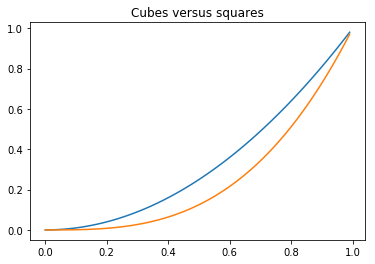

In [69]:
# less trivial example
x_values = np.arange(0,1,.01)
squares = [x**2 for x in x_values]
cubes = [y**3 for y in x_values]

plt.title('Cubes versus squares')
plt.plot(x_values, squares)
plt.plot(x_values, cubes)